In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/Social_Network_Ads.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            400 non-null    int64 
 1   Gender             400 non-null    object
 2   Age                400 non-null    int64 
 3   EstimatedSalary    400 non-null    int64 
 4   EstimatedSalary_K  400 non-null    int64 
 5   Purchased          400 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 18.9+ KB


In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,EstimatedSalary_K,Purchased
0,15624510,Male,19,19000,19,0
1,15810944,Male,35,20000,20,0
2,15668575,Female,26,43000,43,0
3,15603246,Female,27,57000,57,0
4,15804002,Male,19,76000,76,0


In [6]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

In [7]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [5]:
# lựa chọn thuận toán
from sklearn.linear_model import LogisticRegression

In [8]:
# chuẩn bị dữ liệu
X = df[['Age', 'EstimatedSalary_K']]
y = df['Purchased']

In [10]:
X.head()

,Age,EstimatedSalary_K
0,19,19
1,35,20
2,26,43
3,27,57
4,19,76


In [11]:
#tách dữ liệu thành train và test
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# huấn luyện mô hình với dữ liệu trian
model = LogisticRegression()

In [28]:
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
# kiểm tra trên dữ liệu train
yhat_train = model.predict(X_train)

In [30]:
y_train[:5]

3      0
18     1
202    1
250    0
274    1
Name: Purchased, dtype: int64

In [31]:
yhat_train[:5]

array([0, 0, 1, 0, 1], dtype=int64)

In [32]:
# kiểm tra R score
print('R-squared in train dataset:', model.score(X_train, y_train))
print('R-squared in test dataset:', model.score(X_test, y_test))

R-squared in train dataset: 0.8375
R-squared in test dataset: 0.8875


In [33]:
# đo độ chính xác accuracy
from sklearn.metrics import accuracy_score

In [34]:
yhat_test = model.predict(X_test)

In [35]:
print('Accuracy in train dataset:', accuracy_score(y_train, yhat_train))
print('Accuracy in test dataset:', accuracy_score(y_test, yhat_test))

Accuracy in train dataset: 0.8375
Accuracy in test dataset: 0.8875


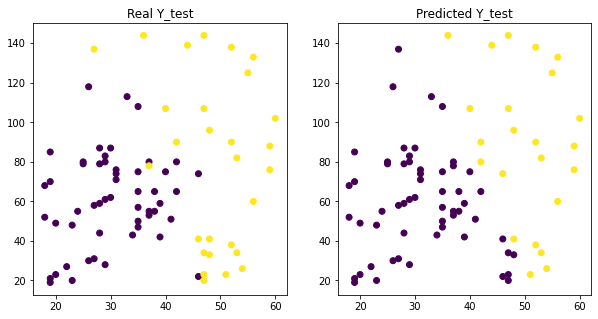

In [38]:
# trực quan hóa kết quả
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x=X_test['Age'], y=X_test['EstimatedSalary_K'], c=y_test)
plt.title('Real Y_test')
plt.subplot(1,2,2)
plt.scatter(x=X_test['Age'], y=X_test['EstimatedSalary_K'], c=yhat_test)
plt.title('Predicted Y_test')
plt.show()

In [40]:
from matplotlib.colors import ListedColormap

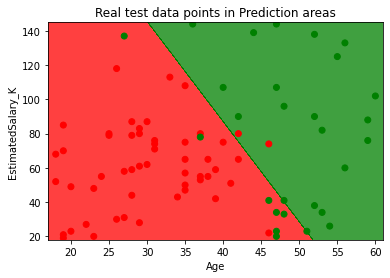

In [45]:
X_set, Y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set['Age'].min()-1,stop=X_set['Age'].max()+1, step=0.01),
 np.arange(start = X_set['EstimatedSalary_K'].min()-1,stop=X_set['EstimatedSalary_K'].max()+1, step=0.01))
plt.contourf(X1,X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.scatter(X_set.Age, X_set.EstimatedSalary_K, c=Y_set, cmap=ListedColormap(('red', 'green')))
plt.xlabel('Age')
plt.ylabel('EstimatedSalary_K')
plt.title('Real test data points in Prediction areas')
plt.show()

In [46]:
## trực quan hóa trên không gian 3d
from mpl_toolkits.mplot3d import Axes3D

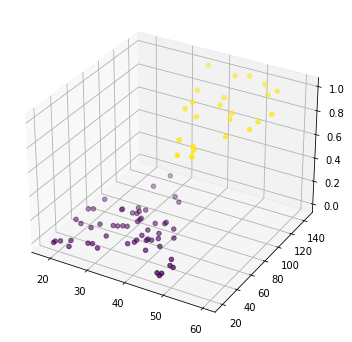

In [47]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['Age'], X_test['EstimatedSalary_K'], yhat_test, c=yhat_test)
plt.show()

In [48]:
## dự đoán giá trị xác suất
yhat_test_prob = model.predict_proba(X_test)

In [49]:
yhat_test[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [50]:
yhat_test_prob[:5]

array([[0.74335835, 0.25664165],
       [0.01832921, 0.98167079],
       [0.9824168 , 0.0175832 ],
       [0.12143918, 0.87856082],
       [0.98766879, 0.01233121]])

In [52]:
## dự đoán trên dữ liệu mới
X_new = [[39, 110], [30, 80], [30, 120]]
yhat_new = model.predict(X_new)
yhat_new

array([1, 0, 0], dtype=int64)